In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.9MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [18]:
#create cnn model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [21]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 100ms/step - loss: 1.3481 - accuracy: 0.5835 - val_loss: 0.6386 - val_accuracy: 0.6268
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5966 - accuracy: 0.6908 - val_loss: 0.5828 - val_accuracy: 0.7016
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4954 - accuracy: 0.7608 - val_loss: 0.4998 - val_accuracy: 0.7572
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4317 - accuracy: 0.8037 - val_loss: 0.6941 - val_accuracy: 0.6398
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3807 - accuracy: 0.8296 - val_loss: 0.4521 - val_accuracy: 0.7882
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3002 - accuracy: 0.8707 - val_loss: 0.4314 - val_accuracy: 0.8166
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2210 - accuracy: 0.9088 - val_loss: 0.4644 - val_ac

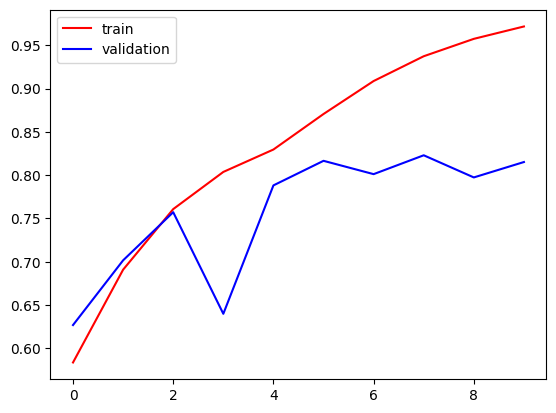

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='Blue',label='validation')
plt.legend()
plt.show()

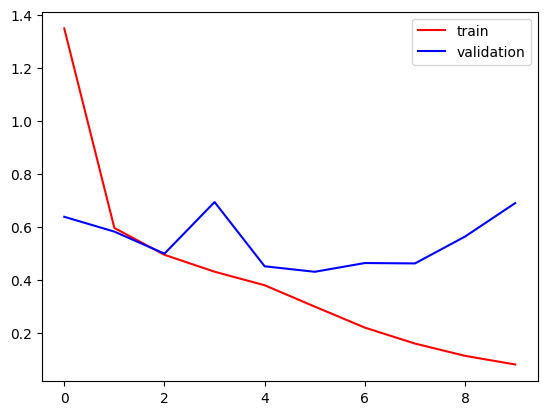

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
import cv2

In [54]:
test_img=cv2.imread('/content/kitty.jpeg')

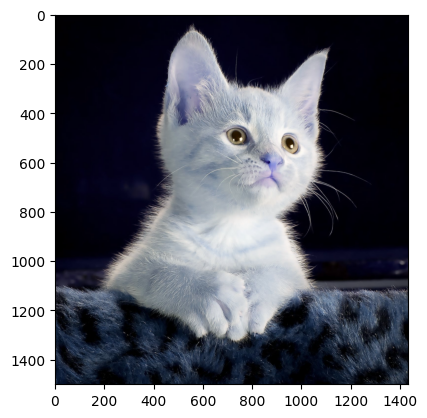

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(1500, 1435, 3)

In [57]:
test_img=cv2.resize(test_img,(256,256))

In [58]:
test_input=test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)